<a href="https://colab.research.google.com/github/comaraDOTcom/ml-applications/blob/main/Etivity1/ET5003_Etivity1_CONOROMARA_20151845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-1

In [ ]:
#@title Current Date
Today = '2021-09-19' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20151845" #@param {type:"string"}
Student_full_name = "Conor O'Mara" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

## MNIST dataset



The MNIST database  is a dataset of handwritten digits that has been and is extensively used in machine learning. There are $10$ classes, each image is $28\times28$ pixels and, therefore, each input is $x_i\in\mathbb{R}^{784}$. 

## Task

You have to extend the code to manage any arbitrary number of classes, in other words you have to implement a general-recipe multinomial logistic classifier and Bayesian multinomial logistic classifier.

You must then select  3 digits at random and perform  the following task. 

1. Your goal is to use Bayesian multinomial logistic regression (as in the road-sign notebook) to solve this classification problem. 

2. You can downsize the training dataset (e.g., 40% training and 60%testing) if the computation of the posterior takes too much time in your computer.

3. Use the posterior uncertainty to detect the instances (digits) in the test set that are hard to classify and remove them from the test-set.

4. Then you need to compute again the accuracy of the general-recipe logistic regression on the remaining (non-difficult) instances and comment on the result.

5. In practice, the task is to use uncertainty estimation to detect the difficult instances in the test-set. This is equivalent to refuse to classify all high-uncertainty instances or, in other words, when we are uncertain we say "I don't know" and we do not return any class. In this way, you will learn how uncertainty can be used to make safer decisions, by detecting the instances that are difficult to classify.


# Introduction



## Dataset
In this etivity, we are working with a dataset of images that are handwritten as in the image below. The features of the dataset are the light intensity for all 784 pixels (28x28) in the image.
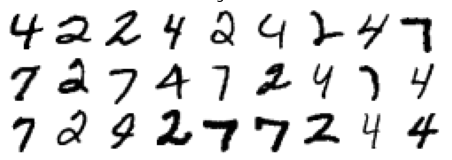

This is an example of supervised learning as we have the labels to which these datapoints refer to. Each image is greyscale (i.e. there is no colour dimension but is a collection of 28x28 pixels with a value between 0 and 1 for the about of intensity in that pixel. Using the labelled data we can train machine learning models to learn on a sample labelled dataset, minimise its error while training on this dataset and then test it on unseen (validation) data to see how it generalises. In this etivity we take 2 approaches for this multi-classification problem (i.e. there are 10 classes as digits can be from 0-9). They are:
* Multinomial regression
* Bayesian multinomial logistic regression


## (A) Multinomial regression
For binomial logistic regression we follow an algorithm like so:
* Randomly generate $\Theta(\bar{y}_{n}$) an order n polynomial inside an activation function (Sigmoid function). $\Theta(x) = \frac{1}{1+e^{-x}}$
* Using a loss function such as mean squared error: $\frac{1}{n}\Sigma_{i=1}^{n}(y_{i}- \bar{y}_{i})^{2}$
* Use gradient descent to modify the coefficient in the model so that the error in our model decreases (this is calculated numerically).
* Update the coefficient by the learning rate factor multiplied by the gradient
* Calculate the new loss
* Repeat until a certain threshold is met.

For **multinomial** regression we train one vs all approach and train (n-1) models to calculate the probabilities and take the argmax of all the classes to calculate the class prediction. Then to calculate the prior probabilities and ensure they sum to one we use the softmax function defined as $ p(y=i|z) = \phi(z) = \frac{e_{i}^{Z}}{\Sigma_{m=1}^{M}e^{Z}_{m}}$.

For our specific case the polynomial is order n=1, we have $\alpha_{j} + \beta_{j}^{T}x$ for each class j in our datset. \alpha and \beta are our weights for our input features and can be learnt through training.

## (B) Probabilistic Multinomial Logistic Regression.
Markox chain monte carlo methods are a class of techniques for sampling from a proabability distribution and can be used to estimate the distribution of parameter given a set of observations.

**Bayesian probability** takes the approach where probabilities are treated as an expression of belief, they are seen as evidence and that combining prior belief and current evidence enables one to compute the posterior. The beliefs are updated as more evidence is provided. 

Bayesian inference states :
$$ P(\theta | D) = \frac{P(D|\theta)p(\theta)}{P(D)} $$

where $P(\theta | D)$ is our posterior, $P(D|\theta)$ is the likelihood, $P(\theta)$ is the prior and $P(D)$ is the evidence. For our problem we would like to find the highest probabilityu of $\theta$ an image belonging to a class given the data we have for training. We can use this to sample the posterior distribution over parameters. In this etivity we train the Bayesian by initialising $\alpha$ and $\beta$ the priors as normal distributions . The likelihood (referred to in the code as $Y_{obs}$ is calculated as $\alpha + \beta^{T}x$ and then train our model on the data using this calculated posterior. After training we draw samples (using monte carlo methods) to infer the distribution of $\alpha$ and $\beta$ which we then put into the softmax function to calculate the probabilities of a datapoint beloinging to a class.

Later on (similar to the approach in the road sign classification notebook), we calculate the mean probability for each data point in the validation set. In this approach I set a threshold of 0.7 required to make a confident prediction on the data and remove images before this from the validation set. Re-running the pre-trained logisitc regression set without these __difficult__ images, the accuracy score improves.


## Libraries

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [154]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.special import softmax
import sklearn.preprocessing
import scipy.optimize as optimize
from scipy.special import erf
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from skimage.io import imread, imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import arviz as az
from scipy.io import loadmat
import pymc3 as pm
import random
from IPython.display import HTML
import pickle
import theano as tt
import cv2
from sklearn.utils import shuffle
from skimage.color import rgb2gray

In [3]:
# Setting a seed:
np.random.seed(123)

### Dataset

### Loading the MNIST dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity1/mnist-data/'

# MNIST Data
train_data = Path + 'mnist_train.csv'
test_data = Path + 'mnist_test.csv'

# train data
df_train = pd.read_csv(train_data)
X_train = df_train.drop("label",axis=1).values
y_train = df_train.label.values
print(X_train.shape)

# test data
df_test = pd.read_csv(test_data)
X_test = df_test.drop("label",axis=1).values
y_test = df_test.label.values
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
# Normalizing the Inputs:
X_train = X_train/255
X_test = X_test/255

# Printing the new input range of values:
minv = np.min(X_train)
maxv = np.max(X_train)
print(minv,maxv)

0.0 1.0


### Description of Data:

In [7]:
# Number of examples
n_train =  len(X_train)
n_test =  len(X_test)

# Shape of an traffic sign image
image_shape = X_train.shape[1]

# unique classes/labels in the training dataset.
alltotal = set(y_train)
n_classes = len(alltotal)

print("Number of Training examples =", n_train)
print("Number of Test examples =", n_test)
print("Image input shape =", image_shape)
print("Number of classes =", n_classes)

Number of Training examples = 60000
Number of Test examples = 10000
Image input shape = 784
Number of classes = 10


### Class Distribution:

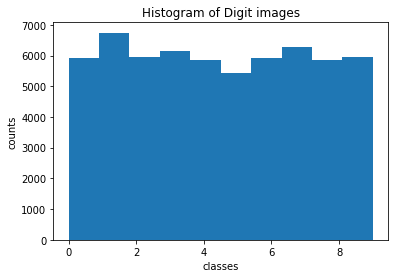

In [8]:
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, n_classes)
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of Digit images')
plt.show()

Class distribution appears reasonably balanced.

## Downsampling

### Randomly selecting 3 of the 10 Digit Classes

In [9]:
n_classes

10

In [28]:

# We select the number of Classes we want (not using NumPy indexing for counts here)
def down_sampling_classes_function(n_classes, k: int)-> list, int:
  """
  This functions return a downsample k of the n_classes (where k<=n) and returns
  the output in a sorted list.
  """
  if k > n_classes or k <= 1:
    raise Exception("Sorry, invalid value of k")
  else:
    k_classes = random.randint(1, n_classes)

    # Initialise an empty list to append the random digit classes we select:
    classes = []
    # We select 3 digits at random and make sure they are unique:
    while len(classes) < k :
        # Randomly drawing a digit from 0-9 (using Numpy indexing):
        num2choose = np.random.randint(0,n_classes)
        # Append the digit if it's not already in our list of classes:
        if num2choose not in classes: 
            classes.append(num2choose)
            
            
    # Sorting the Classes smallest to largest    
    classes.sort()
    print(f"{len(classes)} classes chosen are: {classes}")
    # print classes selected
    return classes, len(classes)

In [29]:
# Generating the down sample of classes for k=3
down_sample_classes, number_of_down_sample_classes = down_sampling_classes_function(n_classes, 3)

3 classes chosen are: [2, 4, 7]


In [50]:
# The number of instances we'll keep for each of our 3 digits:
def down_sampling_instances_function(classes: list, X_train: np.array, y_train:np.array, inst_class: int):
  """
  This function returns a down sample of X_train and y_train for the subset of classes selected in the
  `classes` list accumulating inst_class instances from each chosen class.
  """
  inputs = []
  labels = []


  # Loop to randomly sample the instances for each digit:
  for r in classes:
      imgs = X_train[np.where(y_train==r)[0],:]
      inputs.append(imgs[np.random.permutation(imgs.shape[0]),:][0:inst_class,:])
      labels.append(np.ones(inst_class)*r)
      
  # Shaping inputs and labels in the right format    
  X_train = np.vstack(inputs).astype(np.float64)
  y_train = np.hstack(labels)
  return X_train, y_train

In [51]:
X_train_downsample, y_train_downsample = down_sampling_instances_function(down_sample_classes, X_train, y_train, inst_class=4000)

New Classes Distribution

In [37]:
# new histogram
def plot_class_distribution(n_clases, labels):
  """
  Plot classes and counts
  """
  fig, ax = plt.subplots()
  ind = np.arange(n_classes)

  n, bins, patches = ax.hist(labels, n_classes)
  ax.set_xlabel('classes')
  ax.set_ylabel('counts')
  ax.set_title(r'Histogram of Digit images')
  plt.show()

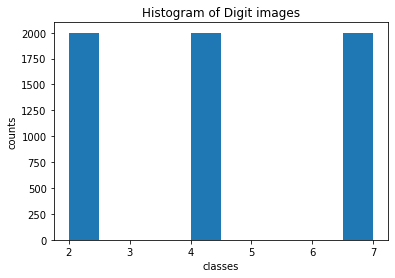

In [43]:
plot_class_distribution(number_of_down_sample_classes, y_train_downsample)

In [40]:
# plot digits
def plot_digits(instances, images_per_row=5, **options):
    """
    Function to plot digits
    """
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gist_yarg', **options)
    plt.axis("off")

Text(0.5, 1.0, 'Original')

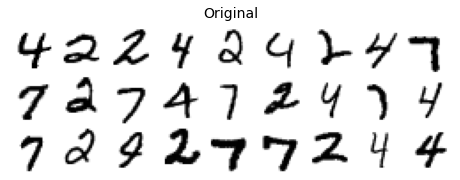

In [44]:
# Show a few instances from each Digit:
plt.figure(figsize=(8,8))

# Selecting a few label indices from each of the 3 classes to show:
label_indices = [random.randint(1,X_train_downsample.shape[0]) for i in range(27)]


# Plotting 'original' image
plot_digits(X_train_downsample[label_indices,:],images_per_row=9)
plt.title("Original", fontsize=14)

###  Splitting the Training data into both Training and Validation Sets:

- Although this is the Training set, we can still set aside some samples (for instance 20%) of the 1,500 instances we have for Model Validation purposes.


- With that Validation Set, we can then select the amount of Uncertainty we are happy with from our Model to use out of sample on other unseen data.


- We can then test out how well our decision performs on the Test Set that we put aside earlier.

In [71]:
### Split tha dataset in training and validation sets
# choose the fraction of your validation data from the training set

def create_training_and_validation_data(X_train: np.array, y_train: np.array, w: float):
  if w > 1 or w < 0:
    raise Exception("Invalid value of w")
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=w, random_state=0)
  
  # Shuffling the training instaces around to randomize the order of inputs to the model:
  X_train, y_train = shuffle(X_train, y_train)
  # print shape of your validation and training set
  print(f"Shape of the validation array {X_val.shape}")
  print(f"Shape of the training array {X_train.shape}")
  return X_train, y_train, X_val, y_val

In [72]:
X_train_downsample, y_train_downsample, X_val_downsample, y_val_downsample = create_training_and_validation_data(X_train_downsample, y_train_downsample, w=0.20)

Shape of the validation array (1536, 784)
Shape of the training array (6144, 784)


### Encoding the Class labels for the Probabilistic ML Model:

This is an example:

- **[1,0,0]** for first digit
- **[0,1,0]** for second digit
- **[0,0,1]** for third digit

### General-Recipe ML

In [236]:
# model
def general_multinomial_regressions(X_train: np.array, y_train: np.array, X_val, y_val):
  """
  This function fits a multinomial regressions to the data, uses the fitted model to makea a prediction on the validation
  data set X_val, 
  """
  model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

  # Classification:
  y_pred_log = model_log.predict(X_val)
  y_pred_logi_prob = model_log.predict_proba(X_val)

  # Maybe taking the maximum probability 
  # in any of the classes for each observation
  prob_classmax = np.max(y_pred_logi_prob, axis=1)

  # Computing the Accuracy:
  accuracy = accuracy_score(y_pred_log, y_val)
  print(f'Multinomial regression had accuracy: {accuracy}')
  return prob_classmax, accuracy, y_pred_logi_prob, y_pred_log, model_log

In [237]:
# run generic multinomial regression on data
classification_matrix, multinomial_regression_accuracy, regression_predicted_proba, y_pred_log, model_log = general_multinomial_regressions(X_train_downsample, y_train_downsample, X_val_downsample, y_val_downsample)

Multinomial regression had accuracy: 0.958984375


In [134]:
def show_minimum_prob_digit(class_matrix, X_train, predicted_proba, down_sample_classes):
  """
  Plot the digit with the minimum probability predicted.
  """
  min_list = [np.argmin(classification_matrix).tolist()]
  plot_digits(X_train_downsample[min_list,:],images_per_row=1)
  plt.title("Instance with minimum probability", fontsize=14)
  return {down_sample_classes[i]: predicted_proba[min_list,i] for i in range(len(down_sample_classes))}

{2: array([4.00242328e-11]), 4: array([0.51246075]), 7: array([0.48753925])}

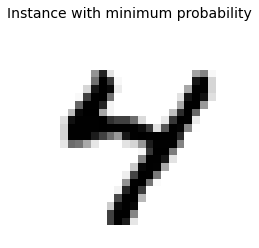

In [135]:
# plot digit with minimum probability
show_minimum_prob_digit(classification_matrix, X_train_downsample, regression_predicted_proba, down_sample_classes)

### Probabilistic Multinomial Logistic Regression:

In [139]:
## We use LabelBinarizer to transfor classes into counts
# neg_label=0, pos_label=1 
y_2_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_train_downsample.reshape(-1,1))
# number of features
nf = X_train_downsample.shape[1]
# number of classes
nc = len(down_sample_classes)
# floatX = float32
floatX = tt.config.floatX

init_b = np.random.randn(nf, nc-1).astype(floatX)
init_a = np.random.randn(nc-1).astype(floatX)

The Multinomial Logistic Regression has some parameters:

- $\alpha$, which is the intercept term:

- $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature:


In [141]:
with pm.Model() as multi_logistic:
    # Prior
    β = pm.Normal('beta', 0, sigma=100, shape=(nf, nc-1), testval=init_b)
    α = pm.Normal('alpha', 0, sigma=100, shape=(nc-1,), testval=init_a)
    
    # we need to consider nc-1 features because the model is not identifiable
    # the softmax turns a vector into a probability that sums up to one
    # therefore we add zeros to go back to dimension nc
    # so that softmax returns a vector of dimension nc
    β1  = tt.tensor.concatenate([np.zeros((nf,1)),β ],axis=1)
    α1  = tt.tensor.concatenate([[0],α ],)
    
    # Likelihood
    mu = pm.math.matrix_dot(X_train_downsample,β1) + α1
    # It doesn't work if the problem is binary
    p = tt.tensor.nnet.nnet.softmax(mu)
    observed = pm.Multinomial('likelihood', p=p, n=1, observed=y_2_bin)

In [144]:
with multi_logistic:
    #approx = pm.fit(300000, method='advi') # takes longer
    approx = pm.fit(3000, method='advi')
    trace_sample = pm.sample(100, tune=100, cores=2, return_inferencedata=True)

Finished [100%]: Average Loss = 12,682
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 6065 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc094a18390>,
      dtype=object)

<Figure size 576x576 with 0 Axes>

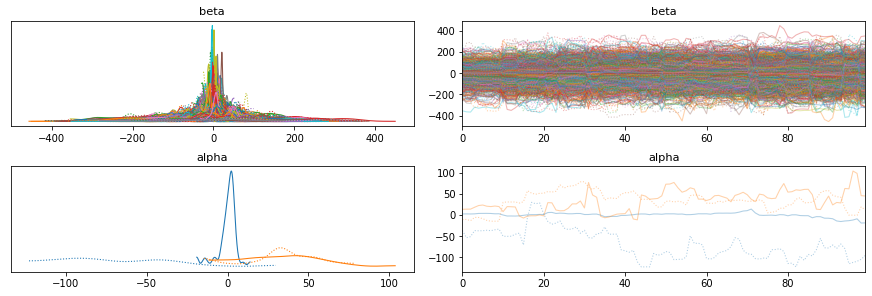

In [156]:
# Ran a small sample using the trace (and it didn't seem to converge.)
plt.figure(figsize=(8,8))
az.plot_trace(trace_sample )

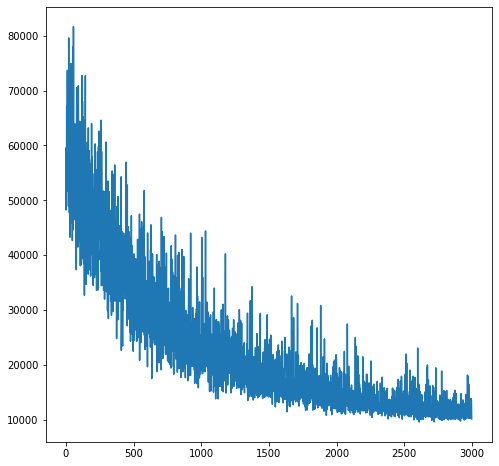

In [157]:
plt.figure(figsize=(8,8))
plt.plot(approx.hist)

In [158]:
dd = 300
posterior = approx.sample(draws=dd)

test image #10
posterior sample #100
true class= 2.0
classes: [2, 4, 7]
estimated prob= [1. 0. 0.]


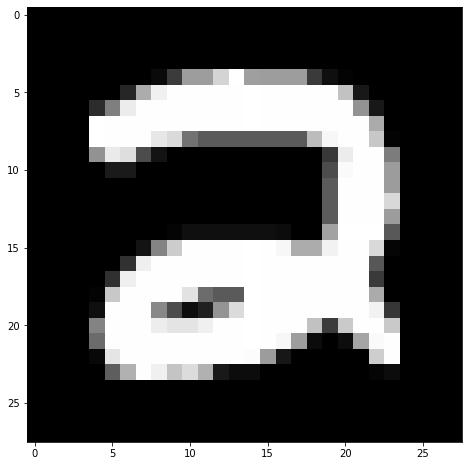

In [159]:
# Validate output with a test image


i = 10 

#select a sample in the posterior
s = 100 


beta  = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
image = X_val_downsample[i,:].reshape(28,28)
plt.figure(figsize=(8,8))
plt.imshow(image,cmap="Greys_r")
np.set_printoptions(suppress=True)

print("test image #" + str(i))
print("posterior sample #" + str(s))
print("true class=", y_val_downsample[i])
print("classes: " + str(down_sample_classes))
print("estimated prob=",softmax((np.array([X_val_downsample[i,:].dot(beta) + alpha])))[0,:])

In [171]:
# Bayesian prediction
# return the class that has the highest posterior probability
y_pred_Bayesian=[]

for i in range(X_val_downsample.shape[0]):
    val=np.zeros((1,len(down_sample_classes)))
    
    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])     
        val = val + softmax((np.array([X_val_downsample[i,:].dot(beta) + alpha])))
    
    mean_probability = val/posterior['beta'].shape[0]
    y_pred_Bayesian.append( np.argmax(mean_probability))

In [181]:
print("Bayesian ML approach produces accuracy=", accuracy_score(np.array(down_sample_classes)[y_pred_Bayesian], y_val_downsample))

Bayesian ML approach produces accuracy= 0.9192708333333334


## Selecting different instances

In [182]:
y_predB=[]

for i in range(X_val_downsample.shape[0]):
    #print(i)
    val=[]

    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
        val.append(softmax((np.array([X_val_downsample[i,:].dot(beta) + alpha])))[0,:])

    #mean probability
    valmean = np.mean(val,axis=0)
    #class with maximum mean probability
    classmax = np.argmax(valmean)
    #ranks
    ranks = np.array(val.copy())
    ranks   = ranks  *0 #init
    colmax = np.argmax(np.array(val),axis=1)
    ranks[np.arange(0,len(colmax)),colmax]=1
     
    y_predB.append( [classmax, valmean[classmax], np.std(ranks,axis=0)[classmax]])

    
y_predB= np.array(y_predB)

In [187]:
# prediction array (for the first 10 samples this is the predict class, probability and standard deviation)
mm = 10
y_predB[0:mm,:]

array([[2.        , 0.99927107, 0.        ],
       [1.        , 0.95657325, 0.17058722],
       [2.        , 0.7100055 , 0.4552899 ],
       [2.        , 0.946171  , 0.18794207],
       [2.        , 0.99986503, 0.        ],
       [1.        , 0.93353045, 0.23120458],
       [0.        , 0.99255404, 0.05763872],
       [1.        , 0.97616948, 0.08137704],
       [0.        , 0.99998962, 0.        ],
       [0.        , 0.99829143, 0.        ]])

In [184]:
#sorting in descending order
difficult = np.argsort(-y_predB[:,2])
y_predB[difficult[0:mm],:]

array([[2.        , 0.49799788, 0.5       ],
       [2.        , 0.50213584, 0.49998889],
       [1.        , 0.48988356, 0.49998889],
       [1.        , 0.49847495, 0.49998889],
       [1.        , 0.50414367, 0.49998889],
       [2.        , 0.50977102, 0.49998889],
       [1.        , 0.50934904, 0.49998889],
       [2.        , 0.49257889, 0.49995555],
       [1.        , 0.4883863 , 0.49995555],
       [1.        , 0.51320846, 0.49989999]])

In [197]:
## Difficult & easy instances

easy = np.argsort(y_predB[:,2])
print("Accuracy in easy instances =", accuracy_score(y_pred_log[easy[0:100]], y_val_downsample[easy[0:100]]))

difficult = np.argsort(-y_predB[:,2])
print("Accuracy in difficult instances =", accuracy_score(y_pred_log[difficult[0:100]], y_val_downsample[difficult[0:100]]))

Accuracy in easy instances = 1.0
Accuracy in difficult instances = 0.85


### Show 10 easy images

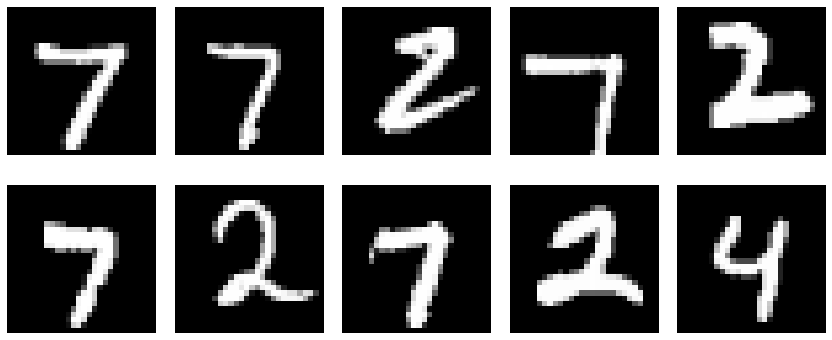

In [200]:
# show 10 random 'easy' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = easy[i]
    image = X_val_downsample[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")

## Show 10 difficult images

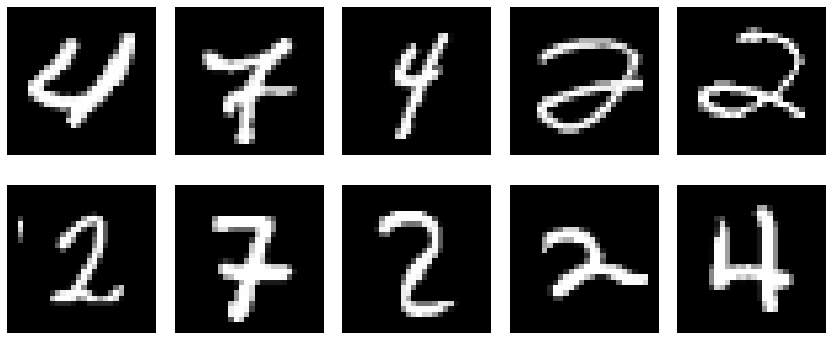

In [203]:
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = difficult[i]
    image = X_val_downsample[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")

## Remove difficult images and retrain the classifier
Set the threshold for images in the validation set which has a mean probability greater than 0.7

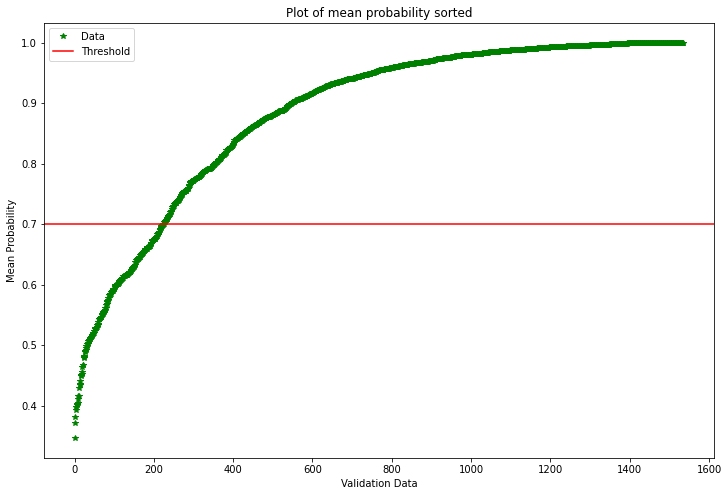

In [248]:
# Plotting the mean probability in sorted in ascending probality. Plotting a threshold of 0.7 to distinguish easy and difficult instances.
plt.figure(figsize=(12,8))
plt.plot(np.sort(y_predB[:,1]), 'g*', label='Data')
plt.axhline(y = 0.7, color = 'r', linestyle = '-', label='Threshold')
plt.xlabel('Validation Data')
plt.ylabel('Mean Probability')
plt.title('Plot of mean probability sorted')
plt.legend()
plt.show()

In [249]:
# Take subset of validation dataset on the condition of mean probability > 0.7.
X_val_non_difficult = X_val_downsample[y_predB[:,1] > 0.7]
y_labels_non_difficult = y_val_downsample[y_predB[:,1] > 0.7]

In [250]:
y_pred_log_non_difficult = model_log.predict(X_val_non_difficult)
new_accuracy = accuracy_score(y_pred_log_non_difficult, non_difficult_y_labels)

In [252]:
print(f"Previous accuracy on full validation dataset = {multinomial_regression_accuracy}")
print(f"Latest accuracy on non-difficult validation dataset = {new_accuracy}")

Previous accuracy on full validation dataset = 0.958984375
Latest accuracy on non-difficult validation dataset = 0.9763539282990084


## Summary

This etivity asked us to perform supervised learning on image data to classify the MNIST dataset. Building out generic methods for training and selecting n classes to train both a multinomial regression model and a proabilistic multinomial bayesian model. 

In this approach, we built a generic method to:
* Choose n classes
* Choose a subset of instances to use for training for n classes
* Train, fit and predict a multinomial regression model
* Use a bayesian multinomial logistic regression model to classify images to build a model with uncertainty in its predictions ( mean values and standard deviations in its predictions). This was done by sampling from the distributions fit for $\beta$ and $\alpha$ to construct the posterior probabilities.
* Using the results of the bayesian models, we were able to sort the validaiton data into difficult and easy datasets (set a threshold at which to drop validation data) if the probabilistic model had difficulty predicting it.

The added value of the **probabilistic** model was clear with the results that we used. The accuracy results for the models were the following:
* Multinomial logistic regression: 95.9%
* Probabilistic multinomial regression: 91.9%
* Multinomial logistic regression (non-difficult validation dataset): 97.6%

I decided to choose a threshold of 0.7 for probability but did not look into any literature as to why this might be or might not be optimal.

The results show us that while the probabilistic multinomial regression did not produce the best results, it did in fact add lots of value that would perhaps be of most value in the real world as it adds uncertainty to the results which help inform us when not making a decision could be wise (if that is a possibility for the application). It also indicates that the multinomial logistic regression could also be in fact overfitting since it does not bring use distribution for $\alpha$ and $\beta$. We can see that the accuracy has improved in the results by removing the difficult images.

In the forums there was discussion on the images that were difficult to classify. In my dataset I used the numbers 2, 4, 7 and it is clear that the samples that were most difficult were when the 4s were very slanted (with the same slope as a 7), when the 7s had a strikethrough and also when the 2s had a loop in them. There are a couple methods that could've been used to try improve the accuracy of the model for these cases. Data augmentation would've increased the size of our dataset by adding small rotations to images (to make up for these slants in handwriting), perhaps add inversions (which works for some but not all numbers like 2 and 5 which can look like each other when inverted), but given more data to these models would've helped the classification results. 

I thought it was interesting that we use the "One vs All" approach for training multinomial regression models and hadn't understood before the need for nc-1 parameters (but how the softmax function requires adding back the last dimension to have probabilities for the nc dimension).

One thing I tried unsuccessfully was to run a `pm.sample` using NUTS(no u turn sampler) using 2 monte carlo chains of length 100 which took 1 hr 46 mins (and the PYMC3 tutorial used 4 chains of length 1000). I received a very messy looking trace for alpha and beta which didn't provide any solid probability distrubtions for potential values. It seems that the `fit` method in the notebook trained much quicker.

In our group Morgan also shared with me the code to generate pdfs out of notebooks.

I found the 2 group calls and the teams channel we had good for conversations and chipping away consitently at this material to have a working (but not polished notebook) for intermediate team deadlines and it also helped me try to get to grips with the material earlier and more consistently.



## References
* (Brooks-Bartlett, J., 2021.), Probability concepts explained: Bayesian inference for parameter estimation. [https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348] (https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348)
* (Moukarzel, 2021), From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in python [https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a)
* (Raschka, 2021), What is the relation between Logistic Regression and Neural Networks and when to use which? [https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html](https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html)
* (Salvatier et al., 2016), Probabilistic programming in Python using PyMC3 [https://peerj.com/articles/cs-55](https://peerj.com/articles/cs-55)
* (Wiecki, 2018) Bayesian Deep Learning — While My MCMC Gently Samples [https://twiecki.io/blog/2016/06/01/bayesian-deep-learning/](https://twiecki.io/blog/2016/06/01/bayesian-deep-learning/)


# Export to pdf

In [61]:
#Export PDF file of the notebook to Google drive
%%capture
pdf_path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity1/pdf/'
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ET5003_Etivity1_CONOROMARA_20151845.ipynb')